# Probability theory

# Boy or Girl paradox

In [29]:
# https://ru.wikipedia.org/wiki/Парадокс_мальчика_и_девочки
import random

def random_kid():
    return random.choice(["boy", "girl"])


both_girls  = 0
older_girl  = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
        
        
print("P(both | older): ", both_girls / older_girl)   # ~ 1/2
print("P(both | either): ", both_girls / either_girl) # ~ 1/3

P(both | older):  0.5007089325501317
P(both | either):  0.3311897106109325


# Bayes Theorem

In [17]:
# https://ru.wikipedia.org/wiki/Теорема_Байеса
# allows you to change the cause and consequence
# the paradox of the Bayes theorem

# Random Variable
# Mathematical Expectation (Expected Value)

# Continuous Distribution
# Probability Density Function (PDF), $p(x)$

In [30]:
def uniform_pdf(x):
    return 1 if x >=0 and x < 1 else 0

# Cumulative Distribution Function (CDF), $P(\xi <= x) = \int_{-\infty}^x{p(t)dt}$

In [42]:
def uniform_cdf(x):
    if x < 0:   return 0
    elif x < 1: return x # P(X <= 0.4) = 0.4
    else:       return 1

# Normal disribution

$f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$

In [4]:
import math

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-0.5 * ((x - mu)/sigma)**2 )) / (sqrt_two_pi * sigma)


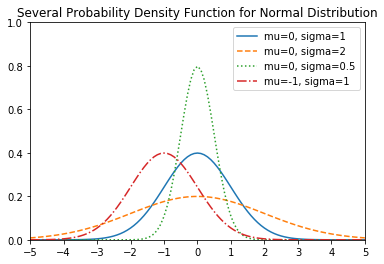

In [5]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 51)]

plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.axis([-5, 5, 0, 1])
plt.xticks([x for x in range(-5, 6)])
plt.legend()
plt.title("Several Probability Density Function for Normal Distribution")
plt.show()

In [6]:
# https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5
# https://en.wikipedia.org/wiki/Error_function
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [7]:
print("F(10): ", normal_cdf(10))
print("F(-10): ", normal_cdf(-10))

F(10):  1.0
F(-10):  0.0


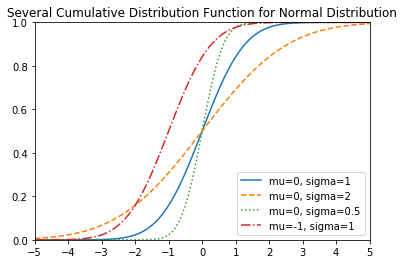

In [8]:
xs = [x / 10.0 for x in range(-50, 51)]

plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.axis([-5, 5, 0, 1])
plt.xticks([x for x in range(-5, 6)])
plt.legend(loc=4)
plt.title("Several Cumulative Distribution Function for Normal Distribution")
plt.show()

In [11]:
# https://en.wikipedia.org/wiki/Двоичный_поиск
# How find value by probability
# tolerance - constant for accuracy
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0 # normal_cdf(-10) = near zero
    hi_z, hi_p   =  10.0, 1  # normal_cdf(10)
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z

In [17]:
print("Value with P = 0.001 -> ", inverse_normal_cdf(0.001))
print("Value with P = 0.25 -> ", inverse_normal_cdf(0.25))
print("Value with P = 0.50 -> ", inverse_normal_cdf(0.5))
print("Value with P = 0.75 -> ", inverse_normal_cdf(0.75))
print("Value with P = 0.90 -> ", inverse_normal_cdf(0.90))
print("Value with P = 0.999 -> ", inverse_normal_cdf(0.999))

Value with P = 0.001 ->  -3.090238571166992
Value with P = 0.25 ->  -0.6744861602783203
Value with P = 0.50 ->  0.0
Value with P = 0.75 ->  0.6744861602783203
Value with P = 0.90 ->  1.2815570831298828
Value with P = 0.999 ->  3.090238571166992


# Central Limit Theorem

In [37]:
import random

# independent Bernoulli test
# with constant probability for 1 and 0
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [55]:
from collections import Counter

def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    histogram = Counter(data)
    plt.bar([x for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu    = p * n
    sigma = math.sqrt(n * p *(1 - p))
    
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i-0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial distribution and its normal approximation")
    plt.show()

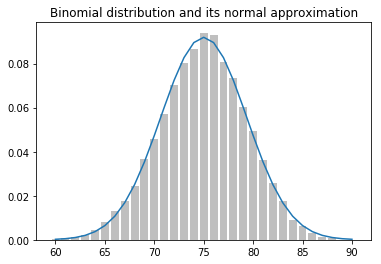

In [56]:
make_hist(0.75, 100, 10000)

# For further study

- See scipy.stats (https://docs.scipy.org/doc/scipy/reference/stats.html)